In [ ]:
!pip install kaggle

In [ ]:
#configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


#Importing the Dog Cat Dataset from Kaggle

In [ ]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats


 98% 793M/812M [00:06<00:00, 200MB/s]
100% 812M/812M [00:06<00:00, 136MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The datset is extracted")

The datset is extracted


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The datset is extracted")

The datset is extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:',file_count)

Number of images: 25000


In [ ]:
#printing the name of the images
file_names = os.listdir('/content/train')
print(file_names)

['dog.1546.jpg', 'cat.1538.jpg', 'dog.1685.jpg', 'cat.3560.jpg', 'cat.5031.jpg', 'dog.3088.jpg', 'cat.2456.jpg', 'cat.2013.jpg', 'dog.5600.jpg', 'cat.1863.jpg', 'cat.1266.jpg', 'cat.3271.jpg', 'cat.4073.jpg', 'cat.5451.jpg', 'cat.7635.jpg', 'cat.3014.jpg', 'cat.12103.jpg', 'dog.4350.jpg', 'dog.3229.jpg', 'cat.2200.jpg', 'dog.9479.jpg', 'cat.10727.jpg', 'cat.3121.jpg', 'cat.2727.jpg', 'cat.9542.jpg', 'cat.5876.jpg', 'cat.9062.jpg', 'cat.4330.jpg', 'cat.3055.jpg', 'dog.12217.jpg', 'dog.8152.jpg', 'cat.1913.jpg', 'cat.7514.jpg', 'dog.1383.jpg', 'dog.9633.jpg', 'cat.11918.jpg', 'cat.4372.jpg', 'cat.4943.jpg', 'dog.6881.jpg', 'cat.3865.jpg', 'dog.3730.jpg', 'dog.10622.jpg', 'cat.7618.jpg', 'cat.9089.jpg', 'cat.10910.jpg', 'dog.9070.jpg', 'dog.11991.jpg', 'cat.2307.jpg', 'cat.6569.jpg', 'cat.2723.jpg', 'dog.3663.jpg', 'dog.845.jpg', 'cat.9146.jpg', 'dog.1396.jpg', 'cat.8137.jpg', 'cat.9791.jpg', 'cat.11843.jpg', 'dog.7027.jpg', 'cat.9273.jpg', 'cat.6689.jpg', 'cat.5590.jpg', 'cat.7179.jpg', 

#importing the dependecies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


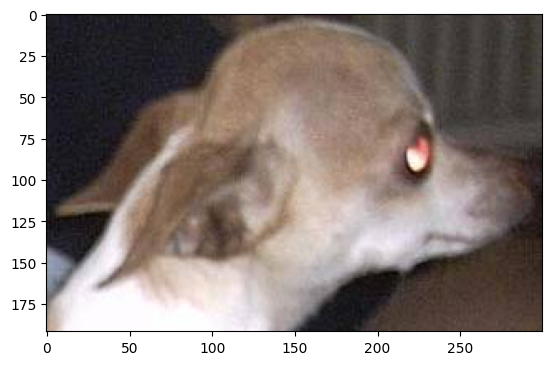

In [ ]:
#displaying the dog  cat images using ......mpimg (matplotlib.image)
img = mpimg.imread('/content/train/dog.5132.jpg')
imgplt = plt.imshow(img)
plt.show()



In [ ]:
file_names = os.listdir('/content/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
dog
cat
cat


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_files in file_names:
  name=img_files[0:3]
  if name == 'dog':
    dog_count +=1
  else:
    cat_count +=1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)



Number of dog images = 12500
Number of cat images = 12500


In [ ]:
#resizing all the images
#creating a directory for resized image (we will use  OS to make directory)
os.mkdir('/content/image resized')

In [ ]:
original_folder ='/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
path, dirs, files = next(os.walk('/content/image resized/'))
file_count = len(files)
print('Number of images:',file_count)

Number of images: 2000


In [ ]:
file_names = os.listdir('/content/image resized/')
print(file_names)

['dog.1546.jpg', 'cat.1538.jpg', 'dog.1685.jpg', 'cat.3560.jpg', 'cat.5031.jpg', 'dog.3088.jpg', 'cat.2456.jpg', 'cat.2013.jpg', 'dog.5600.jpg', 'cat.1863.jpg', 'cat.1266.jpg', 'cat.3271.jpg', 'cat.4073.jpg', 'cat.5451.jpg', 'cat.7635.jpg', 'cat.3014.jpg', 'cat.12103.jpg', 'dog.4350.jpg', 'dog.3229.jpg', 'cat.2200.jpg', 'dog.9479.jpg', 'cat.10727.jpg', 'cat.3121.jpg', 'cat.2727.jpg', 'cat.9542.jpg', 'cat.5876.jpg', 'cat.9062.jpg', 'cat.4330.jpg', 'cat.3055.jpg', 'dog.12217.jpg', 'dog.8152.jpg', 'cat.1913.jpg', 'cat.7514.jpg', 'dog.1383.jpg', 'dog.9633.jpg', 'cat.11918.jpg', 'cat.4372.jpg', 'cat.4943.jpg', 'dog.6881.jpg', 'cat.3865.jpg', 'dog.3730.jpg', 'dog.10622.jpg', 'cat.7618.jpg', 'cat.9089.jpg', 'cat.10910.jpg', 'dog.9070.jpg', 'dog.11991.jpg', 'cat.2307.jpg', 'cat.6569.jpg', 'cat.2723.jpg', 'dog.3663.jpg', 'dog.845.jpg', 'cat.9146.jpg', 'dog.1396.jpg', 'cat.8137.jpg', 'cat.9791.jpg', 'cat.11843.jpg', 'dog.7027.jpg', 'cat.9273.jpg', 'cat.6689.jpg', 'cat.5590.jpg', 'cat.7179.jpg', 

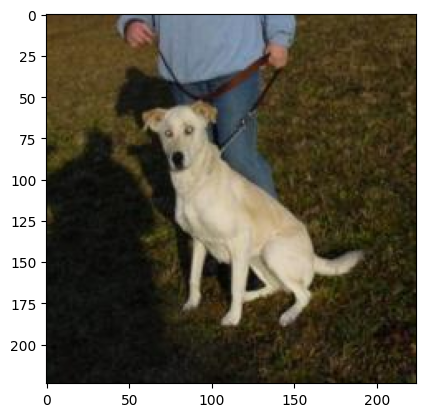

In [ ]:
#displaying the resized dog  cat images using ......mpimg (matplotlib.image)

img = mpimg.imread('/content/image resized/dog.1685.jpg')
imgplt = plt.imshow(img)
plt.show()

#creating labels for resized images of dogs and cats

In [ ]:
#creating a for loop to assign labels for cat and dog images
filenames = os.listdir('/content/image resized')

labels =[]
for i in range(2000):
  file_name = filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.1546.jpg', 'cat.1538.jpg', 'dog.1685.jpg', 'cat.3560.jpg', 'cat.5031.jpg']
2000


In [ ]:
print(labels[0:20])
print(len(labels))

[1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
2000


In [ ]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts =True)
print(values)
print(counts)

[0 1]
[1004  996]


#converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob


In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files =[]

[files.extend(glob.glob(image_directory + '*.'+e))for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file)for file in files])

In [ ]:
print(dog_cat_images)

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
#making x y dimensions
x = dog_cat_images
y = np.asarray(labels)

#train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


#scaling the data

In [ ]:
#values b/w 0 and 1
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [ ]:
print(x_train_scaled)

#Bulding THE NN

In [ ]:
#we are using pretrained model here
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/frameworks/tensorFlow2/variations/tf2-preview-feature-vector/versions/4?tfhub-redirect=true'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2
model =tf.keras.Sequential([
    pretrained_model, tf.keras.layers.Dense(num_of_classes)
])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
#rain the model
model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 34s 618ms/step - loss: 0.2352 - acc: 0.8963
Epoch 2/5
50/50 [==============================] - 32s 631ms/step - loss: 0.0639 - acc: 0.9825
Epoch 3/5
50/50 [==============================] - 33s 655ms/step - loss: 0.0450 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 37s 733ms/step - loss: 0.0351 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 33s 655ms/step - loss: 0.0304 - acc: 0.9894


In [ ]:
#check accuracy and loss of test data
score, acc =model.evaluate(x_test_scaled, y_test)
print('Test loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 8s 616ms/step - loss: 0.0544 - acc: 0.9750
Test loss = 0.05437549576163292
Test Accuracy = 0.9750000238418579


#predictive system

Path of the image to be predicted: /content/doggy.jpg.jpg


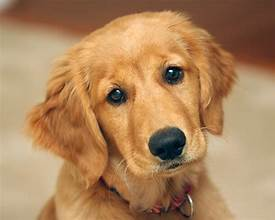

1/1 [==============================] - 0s 58ms/step
The image represent dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path) #this will conert into numpy array

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255
image_reshaped =np.reshape(input_image_scaled, [1,224,224,3])

input_prediction =model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction) #which value is maximum 0 or 1

if input_pred_label == 0:
  print('The image represent a Cat')
else:
  print('The image represent dog')